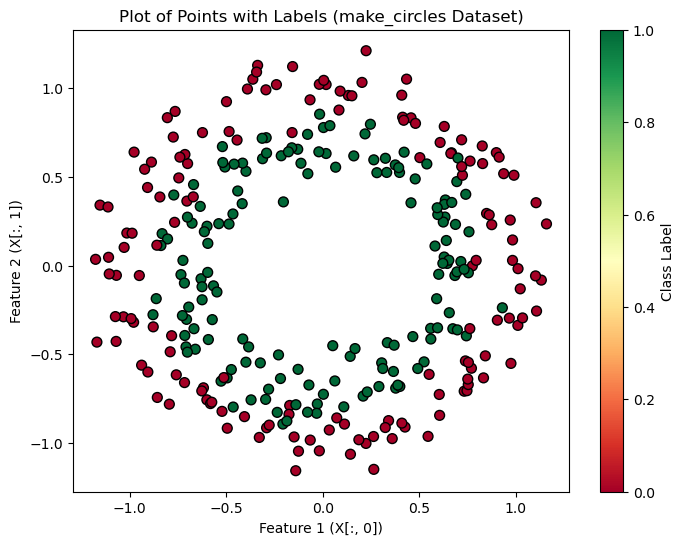

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate Synthetic data (circles)
X, y = make_circles(n_samples=300, noise=0.1, factor=0.7, random_state=0)

# Plot the points with their labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (X[:, 0])')
plt.ylabel('Feature 2 (X[:, 1])')
plt.title('Plot of Points with Labels (make_circles Dataset)')
plt.colorbar(label='Class Label')
plt.show()

# Neural Network Classification with Interactive Visualization

In this notebook, we:
1. Generate synthetic circular data using `make_circles` from scikit-learn
2. Visualize the generated data points
3. Train a Multi-Layer Perceptron (MLP) classifier on the data
4. Visualize the decision boundaries created by the neural network
5. Provide an interactive slider to adjust the number of neurons in the hidden layer and see how it affects the model's decision boundary

The neural network will try to learn the circular pattern in our data. By adjusting the hidden layer size, we can observe how the complexity of the model changes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
try:
    import ipywidgets as widgets
    from IPython.display import display
    from ipywidgets import interactive
    widgets_available = True
except ImportError:
    print("ipywidgets not available. Will use non-interactive alternative.")
    widgets_available = False

# Function to update and display the plot
def update_plot(hidden_layer_size):
    # Use the data from the previous cell (X, y from make_circles)
    
    # Create a multi-layer perceptron (MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='relu', max_iter=3000, random_state=1)
    
    # Fit the classifier to the data
    clf.fit(X, y)
    
    # Create a grid of points for visualization
    # These are 1D arrays of 100 values each, representing the x and y coordinates of the grid
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
    
    # The resulting X_plane and Y_plane are both 100x100 arrays,
    # representing a grid of 10,000 points
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)
    
    # grid_points is a single 2D array of shape (10000, 2),
    # where each row represents a point in the grid
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))
    
    # Predict class labels for the grid points (for decision boundary)
    Z = clf.predict(grid_points)
    Z = Z.reshape(X_plane.shape)
    
    # Predict labels for original data points
    y_pred = clf.predict(X)
    
    plt.figure(figsize=(8, 6))
    
    # Plot the decision boundary
    plt.contourf(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha=0.6)
    
    # Plot the original data points with their predicted labels
    # Separate points for each predicted class
    class_0 = y_pred == 0  # Indices of points predicted as class 0
    class_1 = y_pred == 1  # Indices of points predicted as class 1
    
    plt.scatter(X[class_0, 0], X[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
    plt.scatter(X[class_1, 0], X[class_1, 1], c='green', edgecolors='k', marker='o', s=50, label='Predicted Class 1')
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size={hidden_layer_size})')
    plt.legend()
    plt.show()

if widgets_available:
    # Create a slider for hidden layer size
    hidden_layer_slider = widgets.IntSlider(
        value=3, 
        min=1, 
        max=10, 
        step=1, 
        description='Hidden Layer Size:', 
        continuous_update=False
    )
    
    # Create an interactive plot
    interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_slider)
    
    # Display the interactive widget
    display(interactive_plot)
else:
    # If widgets are not available, show a few examples with different hidden layer sizes
    print("Displaying multiple plots with different hidden layer sizes instead of interactive widget.")
    for hidden_size in [1, 3, 5, 10]:
        print(f"Hidden Layer Size: {hidden_size}")
        update_plot(hidden_size)

interactive(children=(IntSlider(value=3, continuous_update=False, description='Hidden Layer Size:', max=10, mi…